## **EDA Portfolio Project - Treadmill Buyer Profile**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/aerofit_treadmill_data (1).csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### Step 1: Data exploration and processing

In [ ]:
# Checking the shape of the dataframe
df.shape

(180, 9)

In [ ]:
# Inspecting the datatype of each column
df.dtypes

,0
Product,object
Age,int64
Gender,object
Education,int64
MaritalStatus,object
Usage,int64
Fitness,int64
Income,int64
Miles,int64


In [ ]:
# Detecting missing values
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
# Checking for duplicate rows
df.duplicated().sum()

0

**Shape of the Dataframe:** The dataset contains 180 rows and 9 columns.
**Data Types:**
**Categorical:** Product, Gender, MaritalStatus
**Numerical:** Age, Education, Usage, Fitness, Income, Miles
**Missing Values:** There are no missing values in the dataset.
**Duplicate Rows: There are no duplicate rows.**
So from above data exploration and processing we can assume the data is clean.


### Step 2: Statistical Summary

In [ ]:
#Numerical features
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Categorical features: value counts
print("\nValue counts for categorical features:")
for col in df.select_dtypes(include=['object']):
    print(f"\n{col}:\n", df[col].value_counts())


Value counts for categorical features:

Product:
 Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender:
 Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus:
 MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [ ]:
print("\nProduct Distribution:")
print(df['Product'].value_counts(normalize=True) * 100)

print("\nGender Distribution:")
print(df['Gender'].value_counts(normalize=True) * 100)

print("\nMarital Status Distribution:")
print(df['MaritalStatus'].value_counts(normalize=True) * 100)


Product Distribution:
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

Gender Distribution:
Gender
Male      57.777778
Female    42.222222
Name: proportion, dtype: float64

Marital Status Distribution:
MaritalStatus
Partnered    59.444444
Single       40.555556
Name: proportion, dtype: float64


**Numerical Features:**
<br>Customers' ages range from 18 to 50, with an average age of 28.8 years.
<br>The average education level is 15.6 years, indicating that customers are generally well-educated.
<br>The average weekly treadmill usage is 3.46 times, and customers expect to walk/run around 103 miles per week.
<br>The average income is 53,719 dollars, with a wide spread (min: $29,562, max: $104,581).
<br>**Categorical Features:**
<br>**Product:**
<br>KP281: 44.4% of customers.
<br>KP481: 33.3% of customers.
<br>KP781: 22.2% of customers.
<br>**Gender:**
<br>Male: 57.8%.
<br>Female: 42.2%.
<br>**MaritalStatus:**
<br>Partnered: 59.4%.
<br>Single: 40.6%.
<br>The **KP281** treadmill is the **most popular product**, likely due to its affordability as an entry-level model.

### Step 3: Non-Graphical Analysis

In [ ]:
# Unique attributes for categorical features
print("\nUnique values for categorical features:")
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].unique()}")


Unique values for categorical features:
Product: ['KP281' 'KP481' 'KP781']
Gender: ['Male' 'Female']
MaritalStatus: ['Single' 'Partnered']


No anomalies or unexpected values were found in the categorical features.<br>
The data is consistent and suitable for further analysis.

### Step 4: Graphical Analysis

**Univariate Analysis - Numerical features:**

In [ ]:
fig_size = (12, 6)

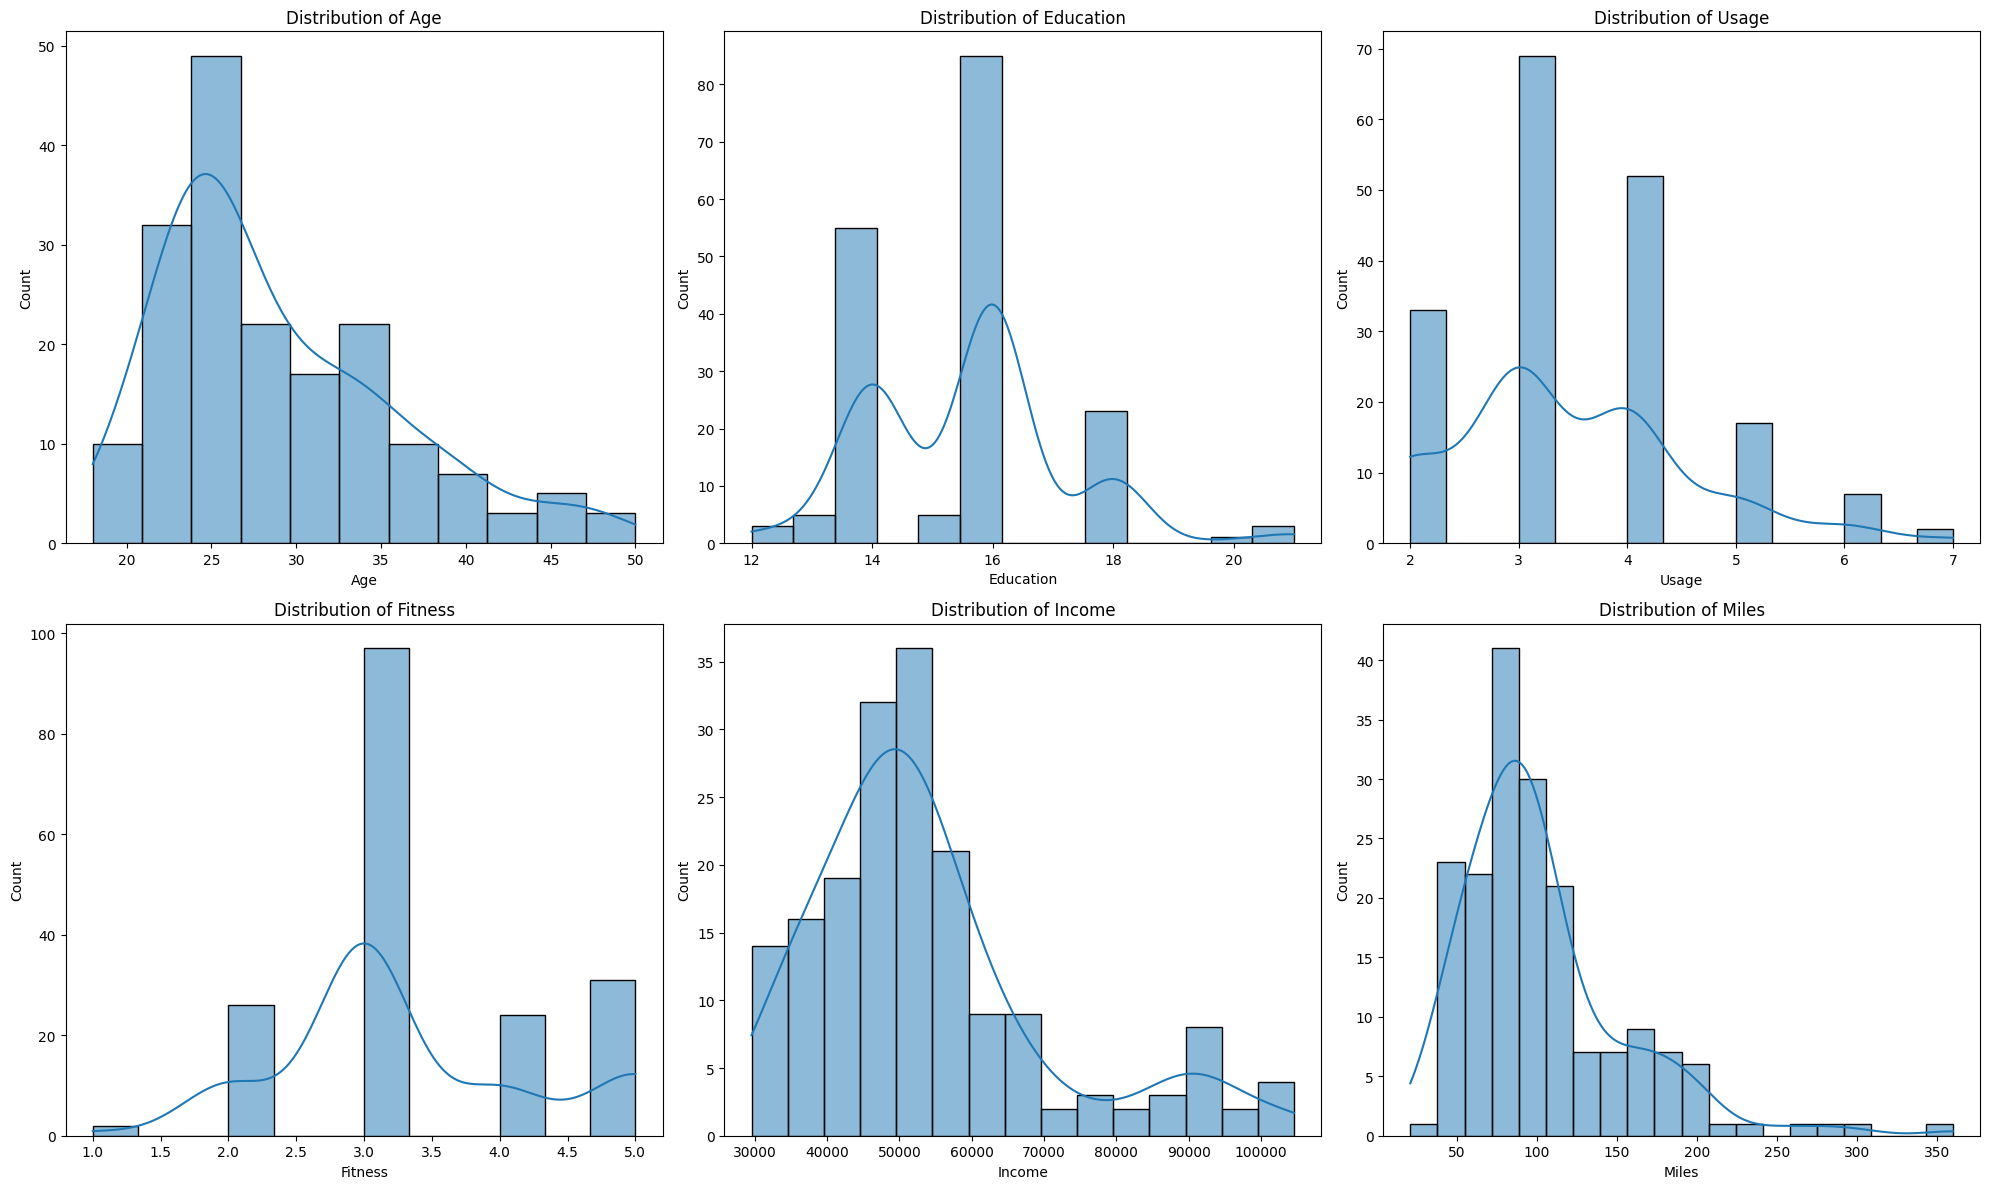

In [ ]:
# Distribution plot
numerical_features = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

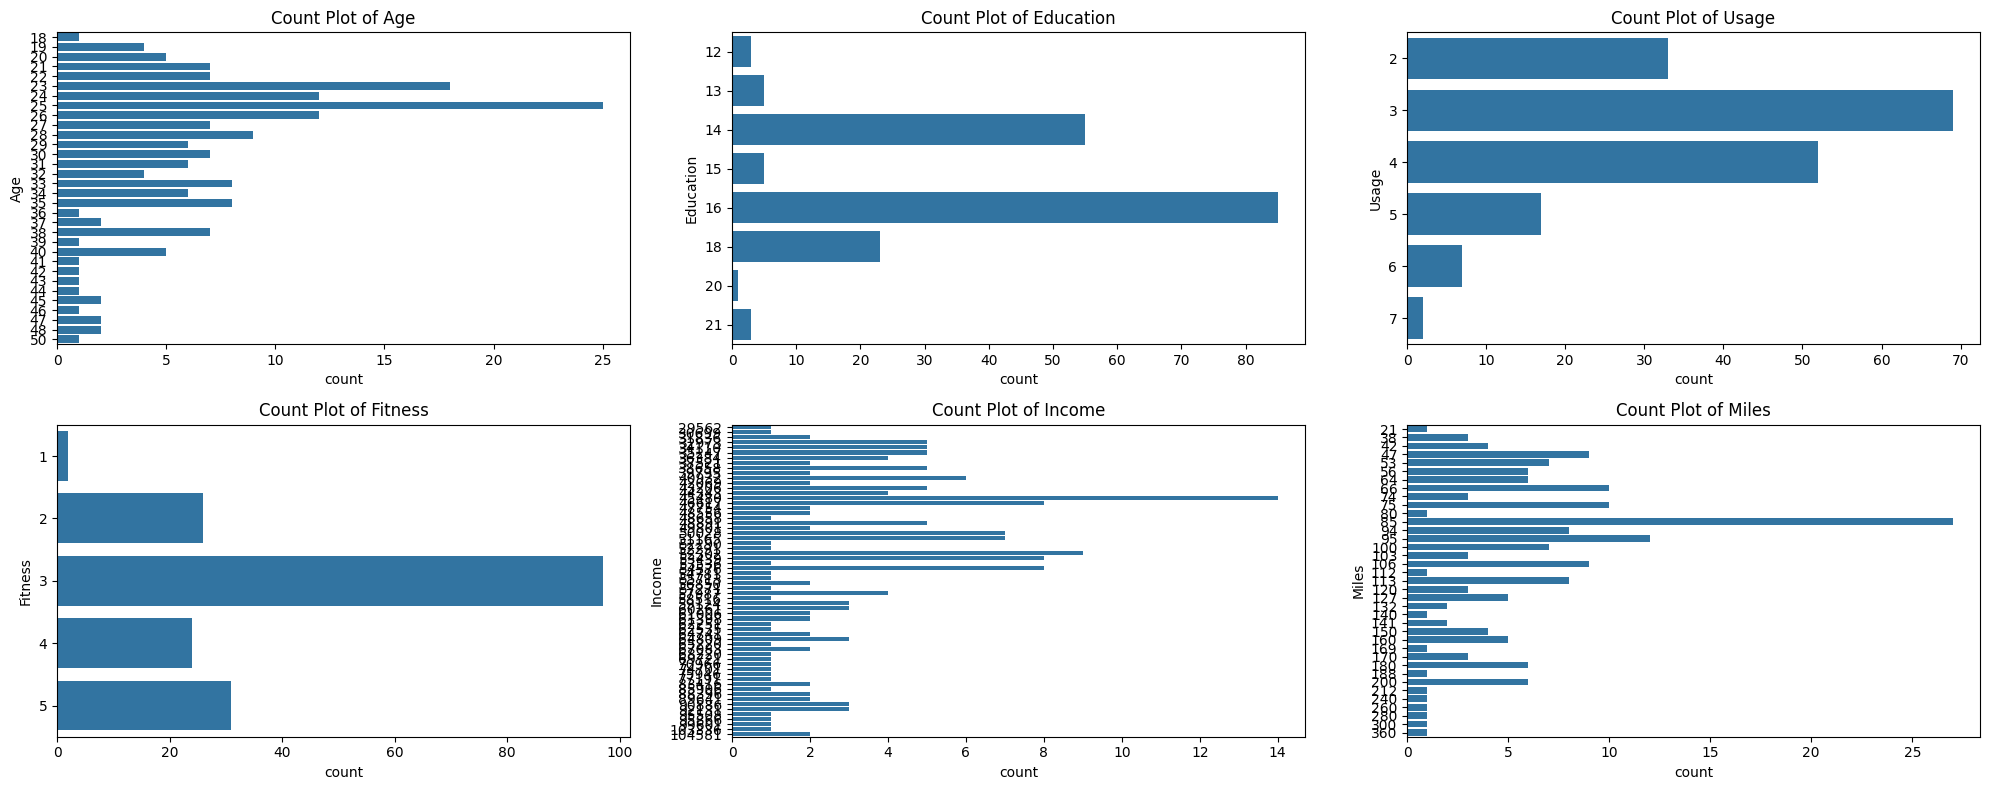

In [ ]:
# Count plots
plt.figure(figsize=(20, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, y=feature)
    plt.title(f'Count Plot of {feature}')
plt.tight_layout()
plt.show()

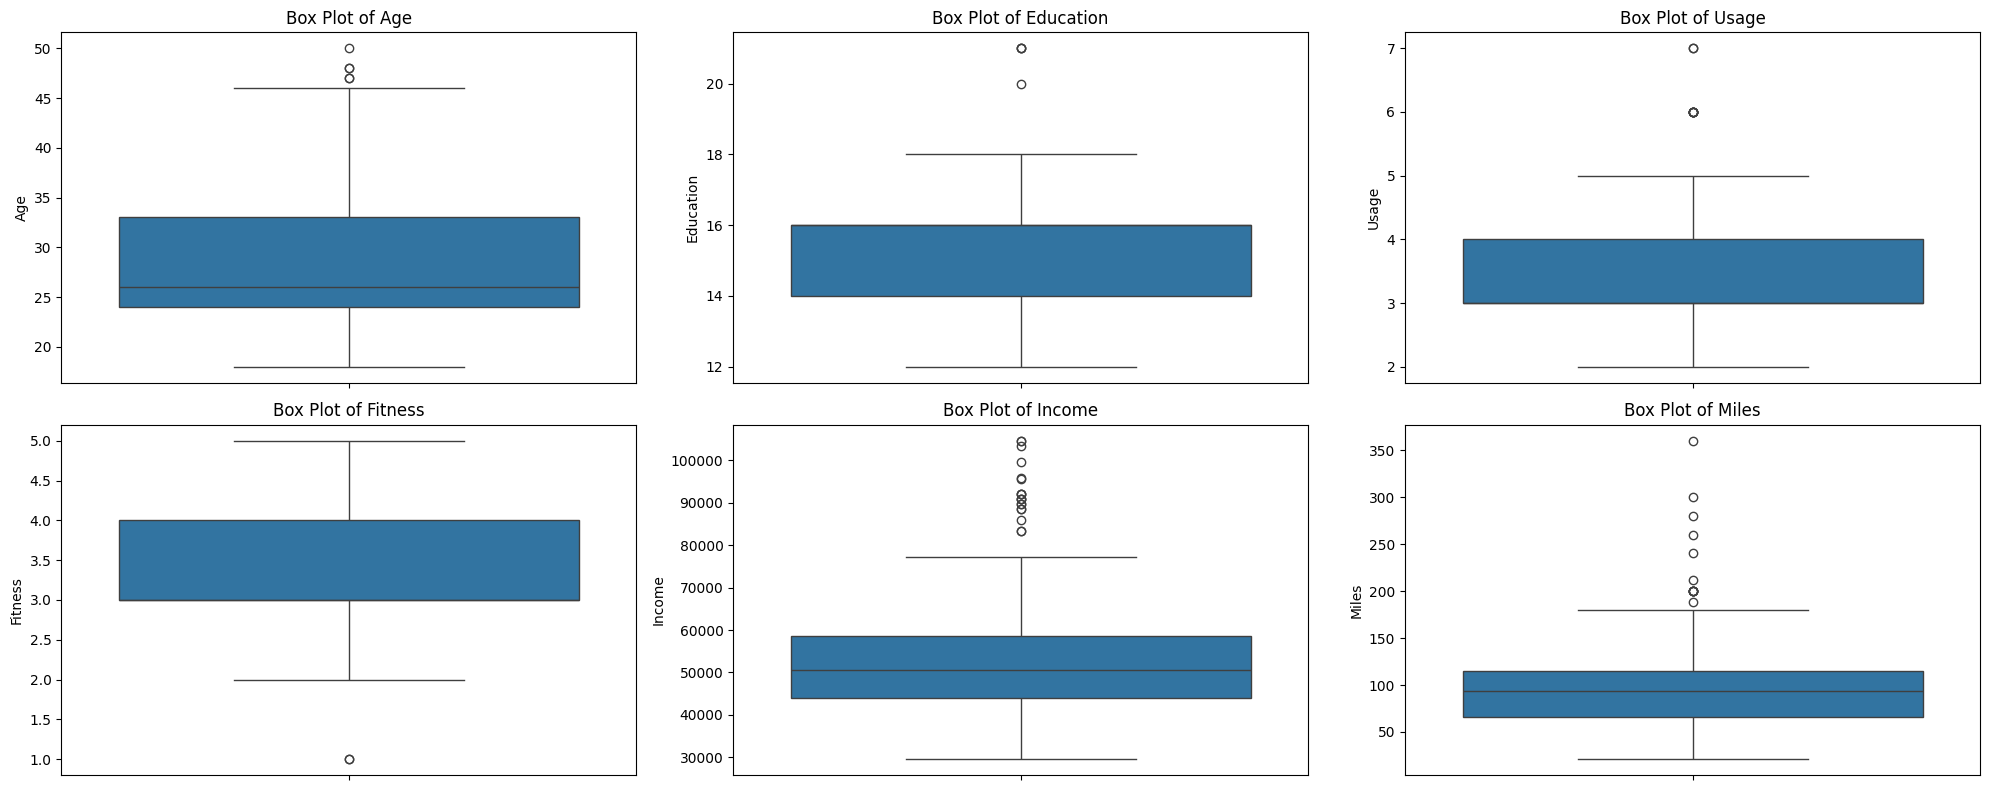

In [ ]:
# Box plots
plt.figure(figsize=(20, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


Age: Most customers are in their 20s and 30s.
<br>Income: Most customers have incomes around 40,000–60,000.
<br>Usage & Miles: Most customers plan to use the treadmill 3–4 times per week and cover 50–120 miles per week.

**Univariate Analysis (Categorical features:):**

In [ ]:
# Categorical Features Analysis
categorical_features = ['Product', 'Gender', 'MaritalStatus']

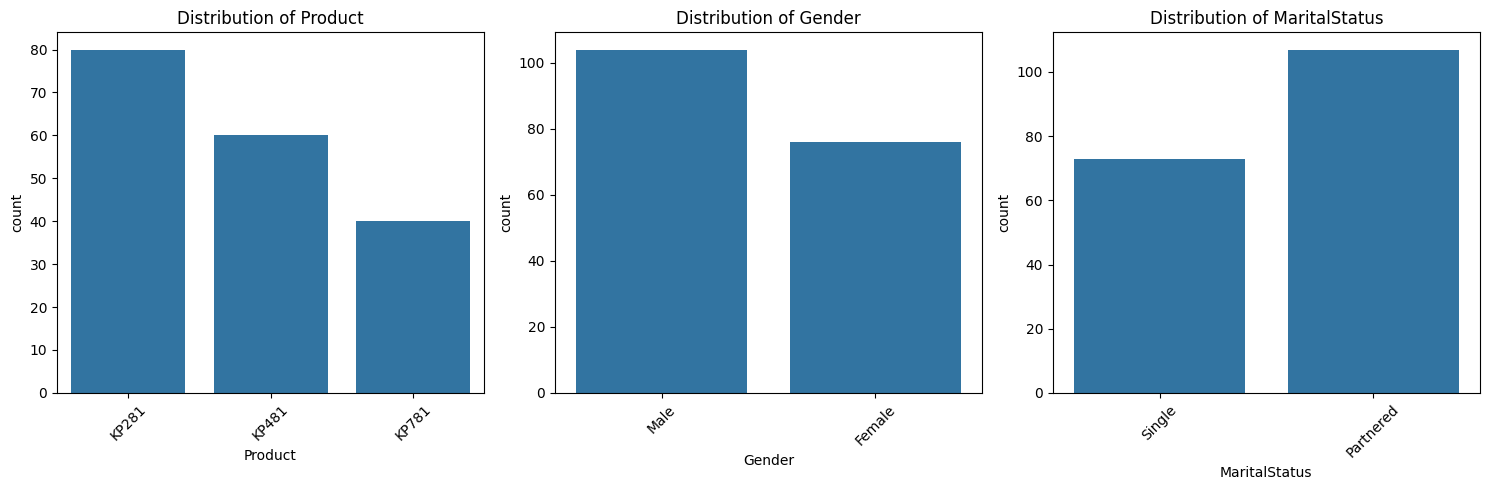

In [ ]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The KP281 model dominates sales, followed by the KP481, and lastly the KP781.

**Bivariate Analysis**

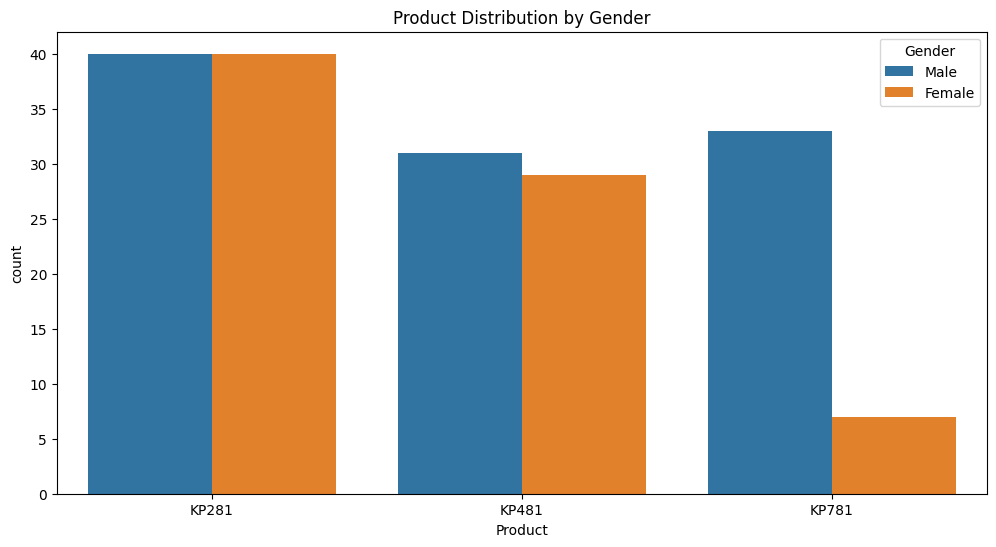

In [ ]:
# Product vs Gender
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='Product', hue='Gender')
plt.title('Product Distribution by Gender')
plt.show()

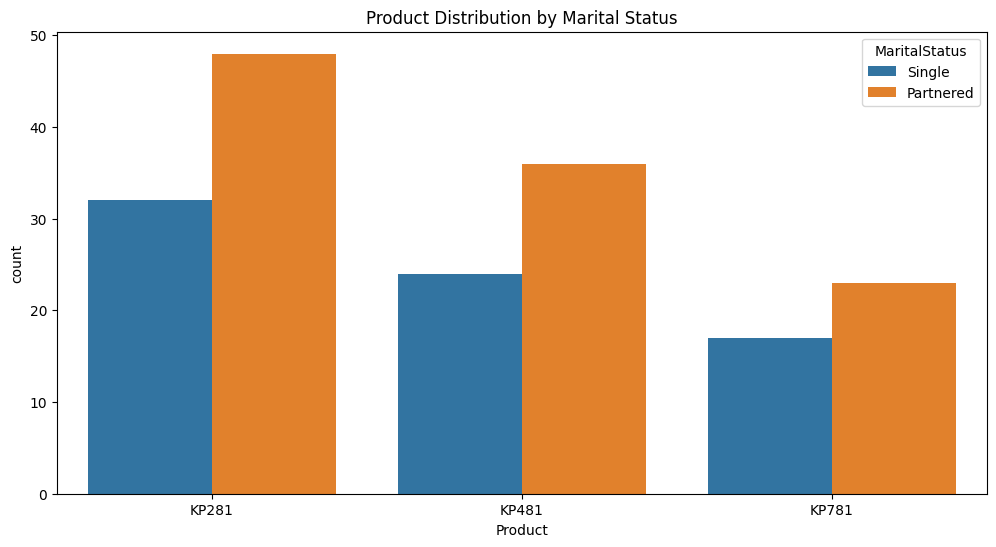

In [ ]:
# Product vs MaritalStatus
plt.figure(figsize=fig_size)
sns.countplot(data=df, x='Product', hue='MaritalStatus')
plt.title('Product Distribution by Marital Status')
plt.show()


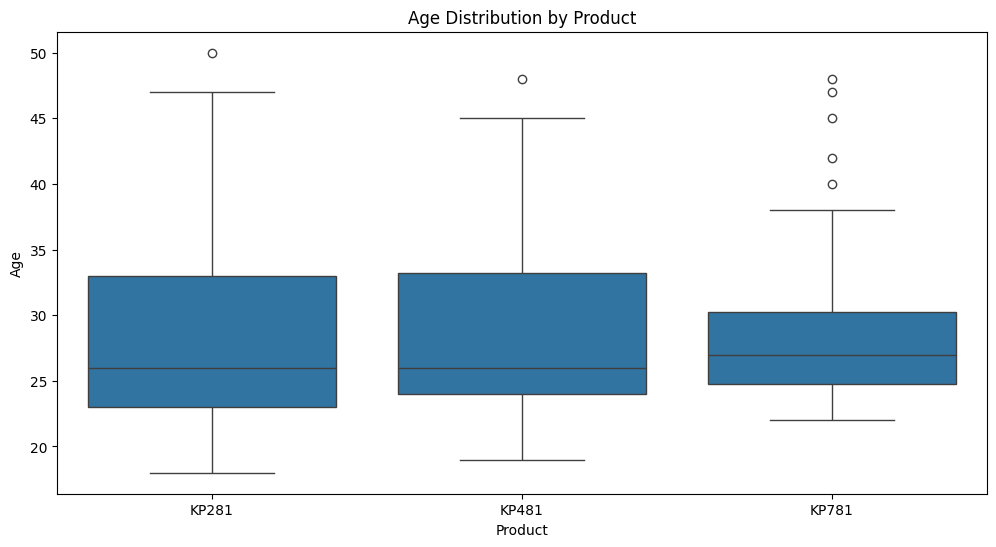

In [ ]:
# Product vs Age
plt.figure(figsize=fig_size)
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Age Distribution by Product')
plt.show()

Product vs Gender: Both males and females purchase the KP281, but males are more likely to buy the higher-tier models (KP481 and KP781).

**Multivariate Analysis**

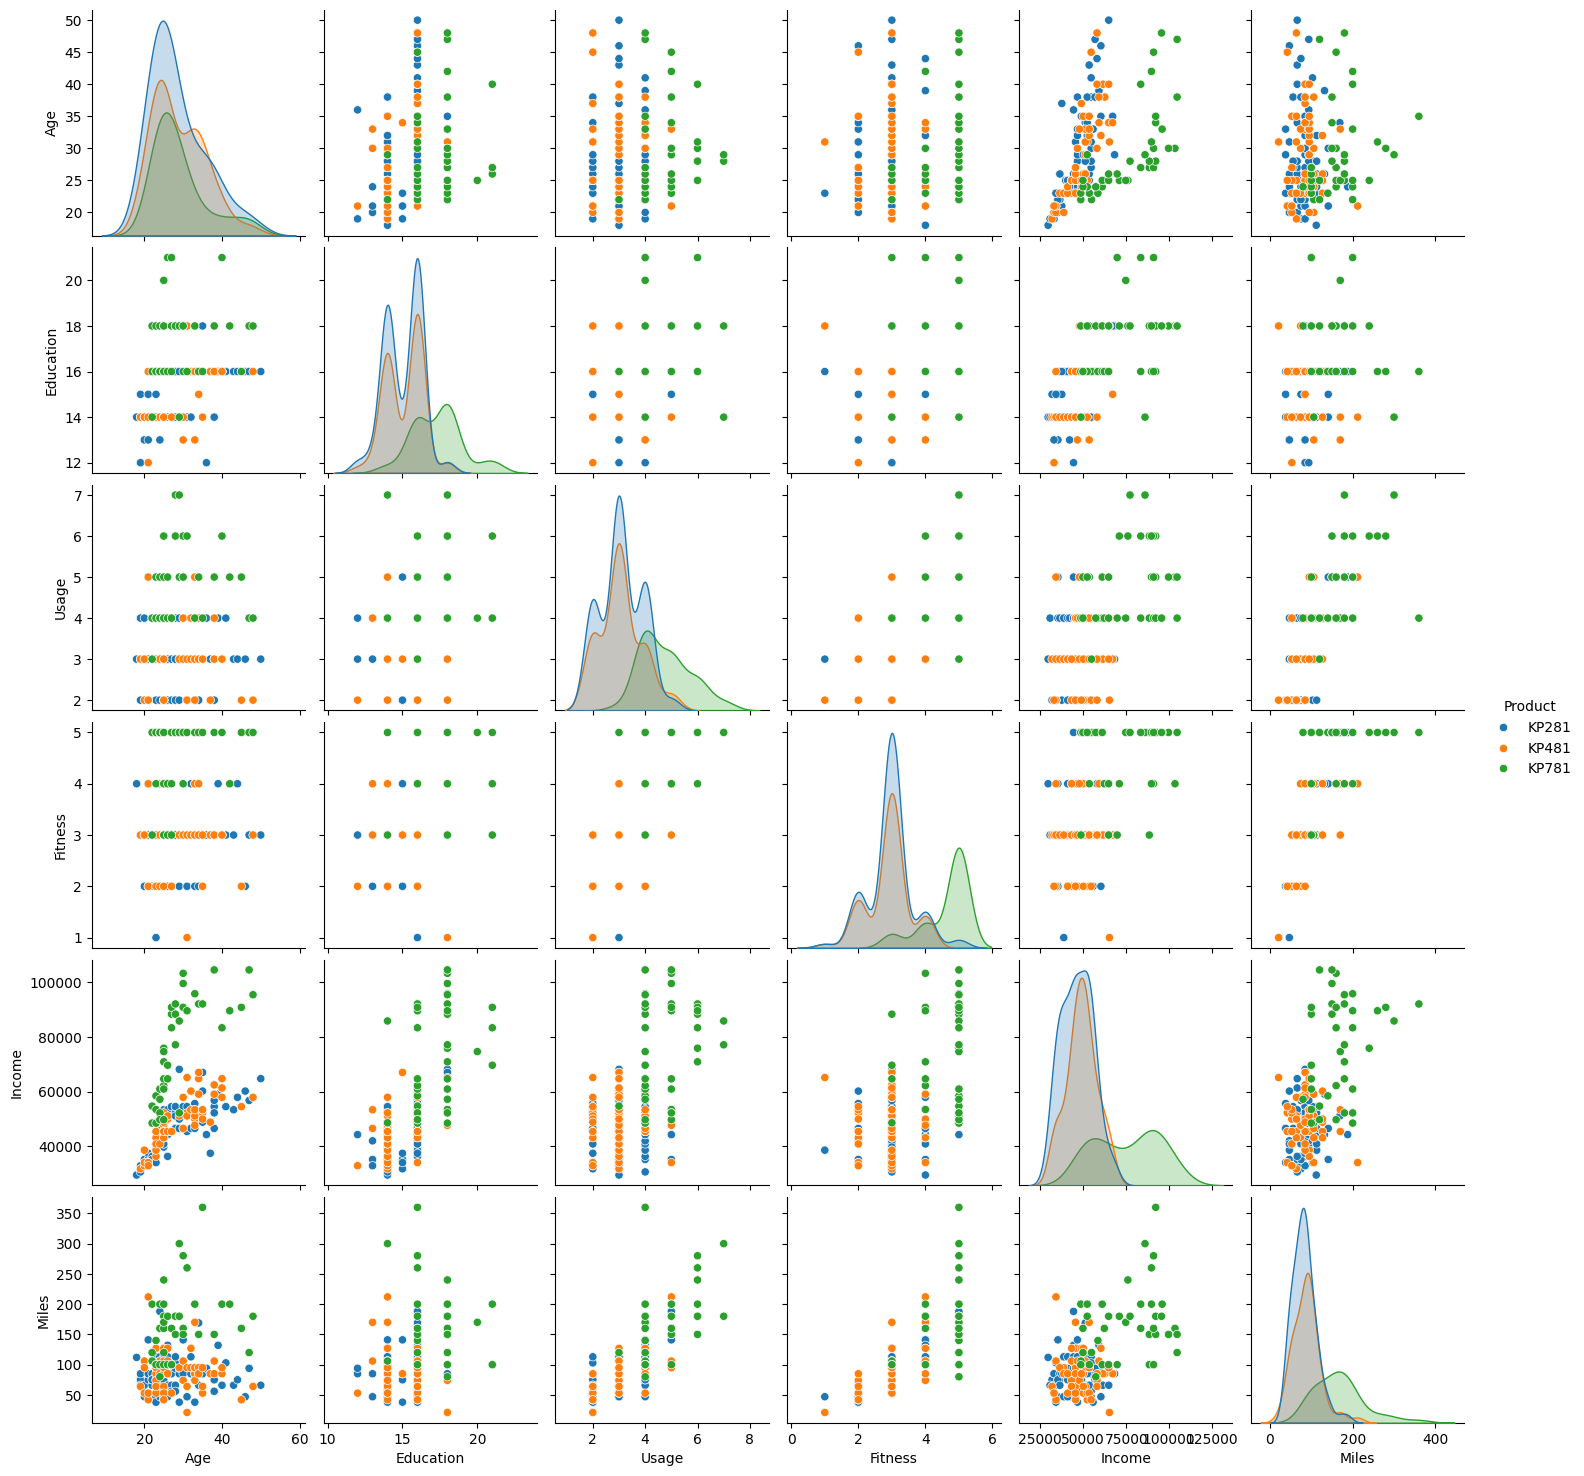

In [ ]:
# Pairplot for relationships among features
sns.pairplot(df, hue='Product', diag_kind='kde')
plt.show()


Pairplots reveal clear income and fitness distinctions between KP281 and KP781 buyers.

### Step 5: Correlation Analysis

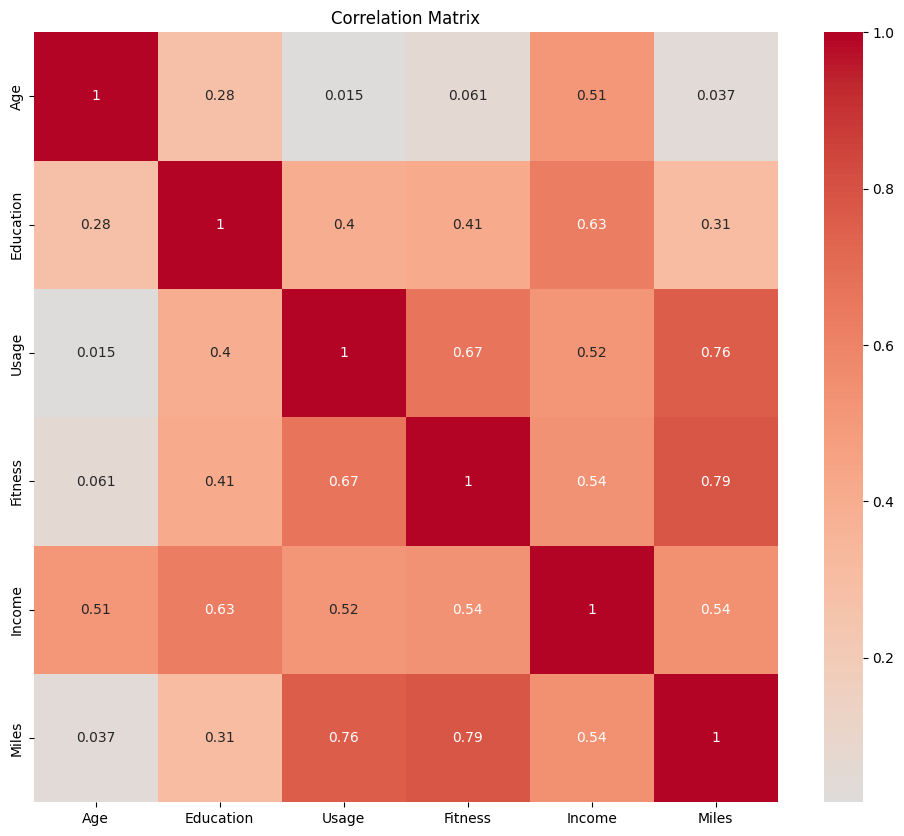

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Income and fitness levels are positively correlated with the purchase of higher-tier treadmills.<br>
Age has a slight positive correlation with income but a weak relationship with other features.

### Step 6: Outlier Detection

In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers)

print("\nOutlier Detection using IQR method:")
for column in numerical_features:
    print(f"Number of outliers in {column}: {detect_outliers(df, column)}")


Outlier Detection using IQR method:
Number of outliers in Age: 5
Number of outliers in Education: 4
Number of outliers in Usage: 9
Number of outliers in Fitness: 2
Number of outliers in Income: 19
Number of outliers in Miles: 13


Miles and Income show a few outliers (e.g., customers running exceptionally high miles or with very high incomes).
<br>Most outliers fall within logical bounds (e.g., fitness enthusiasts with higher incomes).

### Step 7: Conditional Probabilities

In [ ]:
# Product Distribution
print("\nProduct Distribution Percentages:")
print(df['Product'].value_counts(normalize=True) * 100)



Product Distribution Percentages:
Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64


In [ ]:

# Gender-Product Analysis
gender_product = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print("\nProduct Distribution by Gender (%):")
print(gender_product)



Product Distribution by Gender (%):
Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769


In [ ]:
# Female customers with KP781
female_kp781 = len(df[(df['Gender'] == 'Female') & (df['Product'] == 'KP781')]) / len(df) * 100
print(f"Percentage of Female customers with KP781: {female_kp781:.2f}%")


Percentage of Female customers with KP781: 3.89%


In [ ]:
# Age Analysis
young_customers = len(df[(df['Age'] >= 20) & (df['Age'] <= 39)]) / len(df) * 100
print(f"Percentage of customers in 20s and 30s: {young_customers:.2f}%")


Percentage of customers in 20s and 30s: 87.78%


In [ ]:
# Income Analysis
median_income = df['Income'].median()
high_income = len(df[df['Income'] > median_income]) / len(df) * 100
high_income_kp781 = len(df[(df['Income'] > median_income) & (df['Product'] == 'KP781')]) / len(df[df['Product'] == 'KP781']) * 100
print(f"Percentage of high-income customers: {high_income:.2f}%")
print(f"Percentage of KP781 customers with high income: {high_income_kp781:.2f}%")


Percentage of high-income customers: 50.00%
Percentage of KP781 customers with high income: 87.50%


In [ ]:
# Fitness Analysis
fitness_5_total = len(df[df['Fitness'] == 5]) / len(df) * 100
fitness_5_kp781 = len(df[(df['Fitness'] == 5) & (df['Product'] == 'KP781')]) / len(df[df['Fitness'] == 5]) * 100
print(f"Percentage of customers with Fitness Level 5: {fitness_5_total:.2f}%")
print(f"Percentage of Fitness Level 5 customers with KP781: {fitness_5_kp781:.2f}%")


Percentage of customers with Fitness Level 5: 17.22%
Percentage of Fitness Level 5 customers with KP781: 93.55%


In [ ]:
# Marital Status Analysis
partnered = len(df[df['MaritalStatus'] == 'Partnered']) / len(df) * 100
print(f"Percentage of partnered customers: {partnered:.2f}%")

Percentage of partnered customers: 59.44%


**Product Purchases by Gender:**
<br>58% of KP781 buyers are male.
<br>Females are more likely to purchase KP281.
<br>**Product Purchases by Income:**
<br>Low-income customers: Most likely to buy KP281.
<br>High-income customers: Prefer KP781 (50%).
<br>**Product Purchases by Fitness:**
<br>Customers with fitness level 5 are twice as likely to buy KP781 compared to KP281.
<br>**Product Purchases by Marital Status:**
<br>Partnered individuals are more likely to purchase all treadmills but especially the KP481.

In [ ]:
print("\nMean Statistics by Product:")
print(df.groupby('Product')[numerical_features].mean())


Mean Statistics by Product:
           Age  Education     Usage  Fitness     Income       Miles
Product                                                            
KP281    28.55  15.037500  3.087500   2.9625  46418.025   82.787500
KP481    28.90  15.116667  3.066667   2.9000  48973.650   87.933333
KP781    29.10  17.325000  4.775000   4.6250  75441.575  166.900000
